<a href="https://colab.research.google.com/github/Dushxn/ASP.NET-Core---Quote-Management-WebApp/blob/main/MNIST_Digit_Classification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Classification using Neural Network**


Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading MNIST dataset

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [5]:
type(x_test)

numpy.ndarray

In [7]:
#shape of the numpy arrays
print(x_train.shape, y_train.shape ,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Train Data = 60,000

Test Data = 10,000

Image dimensions --> 28 x 28 (grayscale)

In [8]:
#printing the first image
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

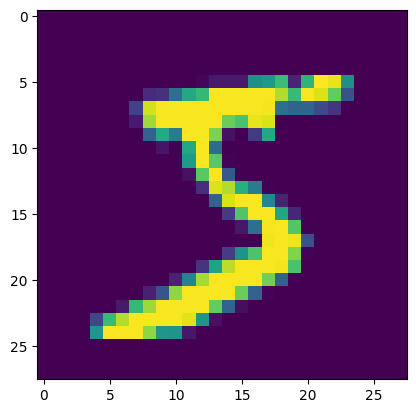

In [9]:
#displaying the image
plt.imshow(x_train[0])
plt.show()

**Unique Values**

In [10]:
#train
print(np.unique(y_train))

#test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


```
We can use labels as it is or we can use one hot encoding.
Also if the images are in different resolutions have to resize as well
(but in this case all are in same resolution)
```

In [11]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

In [12]:
#view the scaled array
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## **Building the Neural Network**

In [14]:
# setting up the layers of basic neural network

model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# Compiling the Neural Network

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Training the Neural Network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8530 - loss: 0.5042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9527 - loss: 0.1563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9659 - loss: 0.1106
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0862
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0426
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0373
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9899 - loss: 0.0327


**Training data accuracy = 98.99%**

```
Accuracy on test data
```

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1306
Loss:  0.11783257871866226
Accuracy:  0.9692000150680542


**Test Data Accuracy = 96.92%**

```
Let's see how the prediction output looks like
```

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(y_pred[0])

[7.7352073e-04 3.1512397e-04 8.4697735e-03 9.7360474e-01 2.1336460e-10
 1.8902726e-03 6.1829705e-14 9.9998486e-01 8.9627001e-03 9.7369885e-01]


**model.predict() gives the prediction probability of each class for that data point**

In [21]:
# Converting the predicted probability into a class label
y_pred_labels = [np.argmax(i) for i in y_pred]

In [22]:
print(y_pred_labels[0])

7


```
y_test --> True Labels
y_pred_labels --> Predicted Labels
```

In [23]:
# Let's Visualize them
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [24]:
# visualize them in a two dimensional array
print(conf_mat)

tf.Tensor(
[[ 960    0    0    3    0    4    7    0    2    4]
 [   0 1116    2    5    0    1    2    1    8    0]
 [   1    0  994   18    3    0    4    3    7    2]
 [   0    0    3  997    0    4    1    1    3    1]
 [   0    0    4    0  961    2    4    2    1    8]
 [   1    0    1   25    3  846    7    0    5    4]
 [   1    3    3    1    4    4  940    0    2    0]
 [   0    2    7   15    0    1    1  975    1   26]
 [   0    0    3   16    9    4    5    4  924    9]
 [   1    2    0    4   13    5    0    2    3  979]], shape=(10, 10), dtype=int32)


Text(0.5, 58.7222222222222, 'Predicted Labels')

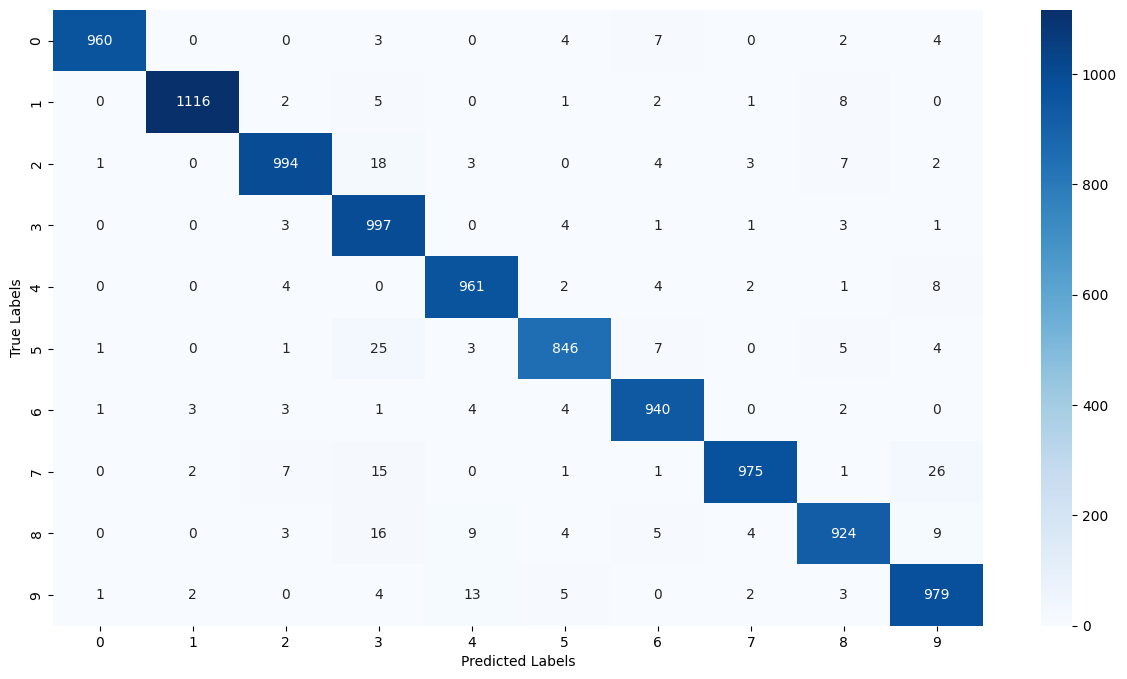

In [25]:
#Using heatmaps for better visualization
plt.figure(figsize = (15,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predictive system**

In [26]:
# Input Image
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [28]:
# check type of the converted image
type(input_image)

numpy.ndarray

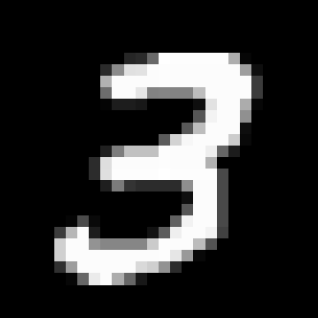

In [29]:
# Display the image
cv2_imshow(input_image)

In [30]:
# evaluate shape of the image
input_image.shape

(318, 318, 3)

In [31]:
# Converting the RGB image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [33]:
# resizing the image to match with required resolution
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize.shape

(28, 28)

In [35]:
# display the resized image
cv2_imshow(input_image_resize)

In [36]:
# scale the image to match with the required scaling
input_image_resize = input_image_resize/255

In [37]:
# reshape the image since to inform model that we only need prediction for one image
input_image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [38]:
# predict the processed image
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[3.7988823e-08 3.2387532e-06 2.9578898e-03 1.0000000e+00 5.0721635e-16
  8.4758794e-04 4.7990308e-20 1.2071067e-08 9.5198470e-01 9.7082764e-01]]


In [39]:
# convert the probabilities into a class label
input_pred_label = np.argmax(input_prediction)

In [40]:
print(input_pred_label)

3


# **Predictive System**

In [45]:
# Input Image
input_image_path = input('path of the image you want to predict?')
input_image = cv2.imread(input_image_path)

# Converting the RGB image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

# resizing the image to match with required resolution
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize.shape

# display the resized image
cv2_imshow(input_image_resize)

# scale the image to match with the required scaling
input_image_resize = input_image_resize/255

# reshape the image since to inform model that we only need prediction for one image
input_image_reshaped = np.reshape(input_image_resize, [1,28,28])

# predict the processed image
input_prediction = model.predict(input_image_reshaped)

# convert the probabilities into a class label
input_pred_label = np.argmax(input_prediction)

print("Predicted Digit : ",input_pred_label)

path of the image you want to predict?/content/MNIST_digit.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Digit :  3
